<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/chapter05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 05 이산형 확률변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%precision 3

x_set = np.array([1, 2, 3, 4, 5, 6])

- 불공정한 주사위의 확률분포는 아래와 같음
![dice-unfailr](https://user-images.githubusercontent.com/291782/196310023-4eff5b28-ad4c-42d2-9f0f-85dbc02cd81f.png)



In [2]:
def f(x) :
    if x in x_set :
        return x / 21
    else :
        return 0

- 확률변수가 취할 수 있는 값의 집합과 확률변수의 세트가 확률분포임
- 이 확률분포에 의해 확률변수 X의 동작이 결정됨
- 따라서 X 는 x_set 과 f 를 요소로 하는 리스트로 구현

In [3]:
X = [x_set, f]

# 확률 p_k를 구한다.
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

- 확률변수가 취할 수 있는 값과 확률을 막대그래프로 표시

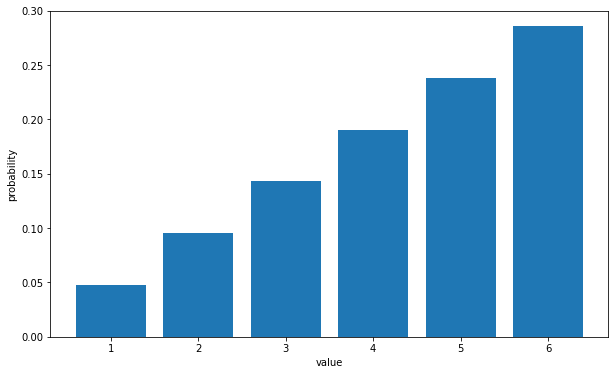

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(x_set, prob)
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

**확률의 성질**

- 확률은 절대적으로 0 이상, 모든 확률을 더하면 1이 되어야함
- 확률이 모두 0 이상인지는 ```np.all``` 함수를 이용하여 확인 가능
- `np.all`은 모든 요소가 참일때만 참을 반환하는 함수

In [5]:
print('모든 확률이 0 이상인가?', np.all(prob >= 0))

print('확률의 총합이 1 인가?', np.sum(prob))

모든 확률이 0 이상인가? True
확률의 총합이 1 인가? 0.9999999999999999


- 불공정한 주사위의 기댓값은 다음과 같다.

In [6]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

- 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
- 파이썬으로 100만 주사위를 굴려 시행해 보자

In [9]:
sample = np.random.choice(x_set, int(1e6), p=prob) # 1e6 (지수) = 1,000,000
np.mean(sample)

4.333321

- 확률변수 X를 2X+3 으로 변환한 확률변수 Y의 기댓값에 관해 생각
- $E(Y) = E(2X + 3) = \displaystyle \sum_{k}(2x_k + 3) f(x_k)$
- 더 일반화하면, 확률변수 X 의 함수 g(X)의 기댓값을 정의할 수 있음
---
**이산형 확률변수의 기댓값**
> $E(g(X)) = \displaystyle \sum_{k}g(x_k)f(x_k)$
---
- 위 수식을 함수로 구현

In [10]:
def E(X, g=lambda x : x) :
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

- g에 아무것도 지정하지 않으면, 확률변수 X의 기댓값이 구해짐

In [11]:
E(X)

4.333333333333333

- 확률변수 Y = 2X + 3 의 기댓값은 다음과 같이 계산

In [12]:
E(X, g=lambda x : 2*x + 3)

11.666666666666664

- 기댓값에는 **선형성** 이라는 성질이 있음
---
**기댓값의 선형성**
> E(aX + b) = aE(X) + b
---
- E(2X + 3) 이 2E(X) + 3 과 같은지 확인

In [13]:
2*E(X) + 3

11.666666666666666

### 분산
- $V(X) = \displaystyle \sum_k(x_k - \mu)^2f(x_k)$
- 불공정한 주사위의 분산을 구해보겠음

In [18]:
mean = E(X)
var = np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])
print('불공정한 주사위의 분산은:', var)

불공정한 주사위의 분산은: 2.2222222222222223


- 확률변수 X 를 2X + 3으로 변환한 확률변수 Y의 분산은 다음식으로 정의됨
- 다만, &mu; = E(2X+3)
- $V(2X+3) = \sum_k((2x_k+3) - \mu)^2f(x_k)$
- 더 일반화화면, 확률변수 X의 함수 g(X)의 분산이 정의됨
---
**이산형 확률변수의 분산**
> $V(g(X)) = \sum_k(g(x_k) - E(g(X)))^2f(x_k)$
---
- 위 수식을 분산의 함수로 구현


In [19]:
def V(X, g=lambda x: x) :
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

- g를 지정하지 않으면, 확률변수 X의 분산을 계산함

In [21]:
print('확률변수 X의 분산은:', V(X))

확률변수 X의 분산은: 2.2222222222222223


- 확률변수 Y=2X+3 은

In [24]:
var = V(X, lambda x:2*x + 3)
print('확률변수 Y=2X+3의 분산은:{0:.3f}'.format(var))

확률변수 Y=2X+3의 분산은:8.889


- 기댓값 (평균)과 마찬가지로, 분산에도 V(2X+3) 을 V(X)를 사용하여 계산할 수 있음
- 이를 위해서는 다음 공식을 사용
---
**분산의 공식**
> a, b를 실수, X를 확률변수라고 하면 $V(aX + b) = a^2V(X)$
---

- 위 공식을 사용하면 $ V(2X+3) = 2^2V(X)$

In [25]:
print(2**2*V(X))

8.88888888888889


## 5.2 2차원 이산형 확률변수
5.2.1 2차원 이산형 확률변수의 정의